# Perkenalan

Nama: Dwi Putra Satria Utama

Email: dwiputra3500@gmail.com

linkedin: https://www.linkedin.com/in/dwiputra3500/

# Studi Kasus dan Tes Teknis : Dashboard Monitoring and Ecommerce Analysis
## Deskripsi Tugas:
Manajemen perusahaan ingin melihat performa penjualan, kondisi ketersediaan jumlah barang 
di gudang, dan perilaku pelanggan dengan tampilan dashboard. Perusahaan menugaskan Anda
untuk memenuhi keinginan tersebut dengan memberikan Anda data-data yang relevan. 

Buatlah dashboard menggunakan alat visualisasi secara pemrograman (Python), atau secara 
non pemrograman seperti Excel, Tableau, Power BI. Dashboard dapat berbentuk Excel, Tableau, 
atau berbentuk laporan PPT. Namun dashboard dalam bentuk halaman website yang dibuat 
dengan Python akan lebih memberikan nilai tambah.

Buat juga presentasi dalam bentuk PPT yang merinci perencanaan, langkah-langkah yang 
diambil dalam proses pengolahan data, dan hasil analisis Anda. Setidaknya analisis Anda harus 
dapat menjawab minimal beberapa pertanyaan berikut :

• Bagaimana kondisi penjualan dari perusahaan?

• Bagaimana distribusi pelanggan yang membeli produk perusahaan?

• Bagaimana kondisi ketersediaan produk di gudang? Apakah masih terpenuhi aman atau 
harus segera dilakukan pengisian ulang?

• Bagaimana cara meningkatkan penjualan dari perusahaan?

• Produk mana yang mendapatkan performa penjualan terbaik dan yang kurang baik?

Anda akan mendapat nilai tambah bila Anda juga membuat analisis prediksi dan rekomendasi 
yang Anda dapat berikan kepada perusahaan dalam studi kasus ini.

## Aturan Pengerjaan :
• Waktu pengerjaan selama 2 x 24 jam ketika tugas diberikan

• Peserta harus mengumpulkan file PPT presentasi, dan file Dashboard. Sertakan python code bila peserta mengerjakan dengan Python.

## Sampel Dataset dan Penjelasan Field (File Terlampir):

`datauser2023.csv`

• User_ID : kode identitas pembeli

• Age : umur pembeli

• Status : status berlangganan

`dataproduk2023.csv`

• PRODUCT_ID : kode produk yang dijual

• JUMLAH_DIGUDANG : jumlah produk yang tersisa di gudang

• HARUS_RESTOCK_BILA_JUMLAH_GUDANG_TERSISA : bila sisa produk yang dijual sudah mencapai angka yang tertera, maka harus segera dilakukan pengisian ulang / restock.

• HARGA_SATUAN : harga satuan produk dalam rupiah

`datatransaksi2023.csv`

• User_ID : kode identitas pembeli

• Transaction_ID : kode identitas transaksi

• Date : Tanggal terjadinya transaksi

• Product : Produk yang dibeli

• Quantity : Jumlah produk yang dibel

# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data loading

In [2]:
df_user = pd.read_csv('data/datauser2023.csv')
df_produk = pd.read_csv("data/dataproduk2023.csv", sep=';')
df_transaksi = pd.read_csv('data/datatransaksi2023.csv', sep=';')

In [3]:
df_user.head()

,User_ID,Age,Status
0,#1,32,premium
1,#2,36,premium
2,#3,39,premium
3,#4,30,premium
4,#5,33,basic


In [4]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User_ID  20 non-null     object
 1   Age      20 non-null     int64 
 2   Status   20 non-null     object
dtypes: int64(1), object(2)
memory usage: 612.0+ bytes


In [5]:
df_produk

,PRODUCT_ID,JUMLAH_DIGUDANG,HARUS_RESTOCK_BILA_JUMLAH_GUDANG_TERSISA,HARGA_SATUAN
0,a,191,50,5000
1,b,173,100,3500
2,c,142,40,12000
3,d,207,15,15000
4,e,184,20,9500


In [6]:
df_produk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   PRODUCT_ID                                5 non-null      object
 1   JUMLAH_DIGUDANG                           5 non-null      int64 
 2   HARUS_RESTOCK_BILA_JUMLAH_GUDANG_TERSISA  5 non-null      int64 
 3   HARGA_SATUAN                              5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 292.0+ bytes


In [7]:
df_transaksi

,User_ID,Transaction_ID,Date,Product_ID,Quantity
0,#14,ye2z9,01/01/2023,A,3.0
1,#17,2yb1J,01/01/2023,E,3.0
2,#1,EhrXU,01/01/2023,C,4.0
3,#5,9tNQZ,01/01/2023,D,2.0
4,#17,Mv68i,02/01/2023,A,3.0
...,...,...,...,...,...
293,#13,OGFx7,29/04/2023,B,NaN
294,#18,S4NAN,30/04/2023,B,4.0
295,#1,ZCe0d,30/04/2023,D,4.0
296,#14,4jtlL,30/04/2023,E,3.0


In [8]:
df_transaksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User_ID         298 non-null    object 
 1   Transaction_ID  298 non-null    object 
 2   Date            298 non-null    object 
 3   Product_ID      298 non-null    object 
 4   Quantity        277 non-null    float64
dtypes: float64(1), object(4)
memory usage: 11.8+ KB


Data berhasil diimport, akan tetapi datanya masih belum bisa digunakan untuk dianalisis. Sehingga perlu dilakukan permbersihan terlebih dahulu.

# Data cleaning

## df_user cleaning

In [9]:
df_user.columns=df_user.columns.str.upper()

In [10]:
df_user.duplicated().sum()

0

In [11]:
# Menghilangkan tanda pagar (#) dari kolom 'User_ID' dan mengganti tipe data
df_user['USER_ID'] = df_user['USER_ID'].str.replace('#', '').astype(int)


# df_produk cleaning

In [12]:
df_produk.columns=df_produk.columns.str.upper()

In [13]:
df_produk.duplicated().sum()

0

## df_transaksi cleaning

In [14]:
df_transaksi.columns=df_transaksi.columns.str.upper()

In [15]:
df_transaksi.duplicated().sum()

0

In [16]:
df_transaksi

,USER_ID,TRANSACTION_ID,DATE,PRODUCT_ID,QUANTITY
0,#14,ye2z9,01/01/2023,A,3.0
1,#17,2yb1J,01/01/2023,E,3.0
2,#1,EhrXU,01/01/2023,C,4.0
3,#5,9tNQZ,01/01/2023,D,2.0
4,#17,Mv68i,02/01/2023,A,3.0
...,...,...,...,...,...
293,#13,OGFx7,29/04/2023,B,NaN
294,#18,S4NAN,30/04/2023,B,4.0
295,#1,ZCe0d,30/04/2023,D,4.0
296,#14,4jtlL,30/04/2023,E,3.0


In [17]:
df_transaksi.QUANTITY.unique()

array([ 3.,  4.,  2.,  1., nan])

In [18]:
# Menghilangkan tanda pagar (#) dari kolom 'User_ID'
df_transaksi['USER_ID'] = df_transaksi['USER_ID'].str.replace('#', '').astype(int)

# Merubah format data
df_transaksi['DATE'] = pd.to_datetime(df_transaksi['DATE'], format='%d/%m/%Y')

In [19]:
df_transaksi.isnull().sum()

USER_ID            0
TRANSACTION_ID     0
DATE               0
PRODUCT_ID         0
QUANTITY          21
dtype: int64

In [20]:
print('Data hilang (%):', df_transaksi.shape[0] / df_transaksi.QUANTITY.isnull().sum())

Data hilang (%): 14.19047619047619


Pada data transaksi terdapat missing values. Ketika terdapat missing values, best practice yang dilakukan pada dunia kerja adalah melakukan konfirmasi kepada tim terkait, apakah data tersebut memang missing values yang normal adanya atau missing values yang diakibatkan adanya anomali pada penginputan data.

Disisi lain, data yang hilang adalah `quantity` dari `data transaksi` sehingga hilangnya data adalah missing values normal, dengan asumsi ada pelanggan yang mau melakukan transaksi tetapi dibatalkan sehingga quantitynya menjadi NaN dan database tetap mencatat transaksi.

Sehingga saya memutuskan untuk melakukan drop missing values karena saya mengaggap data yang missing pada konteks ini saya simpulkan tidak melakukan transaksi. Sehingga ketika tidak ada transaksi, data tersebut tidak diperlukan dalam melakukan analisis transaksi/penjualan.

Perlu dicatat, bahwa missing values harus dikonfirmasi ke tim terkait sebelum dilakukan handling. 

Karena dalam konteks kali ini adalah `ujian/test` yang mana saya tidak memiliki pengetahuan yang betul betul holostik dari sisi bisnis perusahaan dan sistem. Maka keputusan yang saya buat pada konteks ini adalah berdasarkan asumsi dengan dasar dasar yang sudah saya sebutkan di atas.

In [21]:
df_transaksi.dropna(inplace=True)

## Cek distribusi dan outliers

In [22]:
import seaborn as sns

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def hist_boxplot(df, variable):
    """
    Fungsi untuk menampilkan histogram dan boxplot dari suatu fitur dalam dataframe.

    Parameters:
    - df: Pandas DataFrame, dataframe yang akan diplot.
    - variable: string, nama kolom fitur yang akan diplot.
    """
    try:
        # Memunculkan histogram
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(df[variable], kde=True, color='blue')
        plt.title('Histogram')

        # Memunculkan boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[variable], color='orange')
        plt.title('Boxplot')

        plt.show()

        # Menampilkan skewness jika data numerik
        if pd.api.types.is_numeric_dtype(df[variable]):
            print('Skewness:', df[variable].skew())
            if (df[variable].skew() <= -0.5) or (df[variable].skew() >= 0.5):
                print('Skewed')
            else:
                print('Normal')

        # Menampilkan rata-rata jika data numerik
        if pd.api.types.is_numeric_dtype(df[variable]):
            print('Mean:', df[variable].mean())
            
    except TypeError as e:
        print(f"Error: {e}")




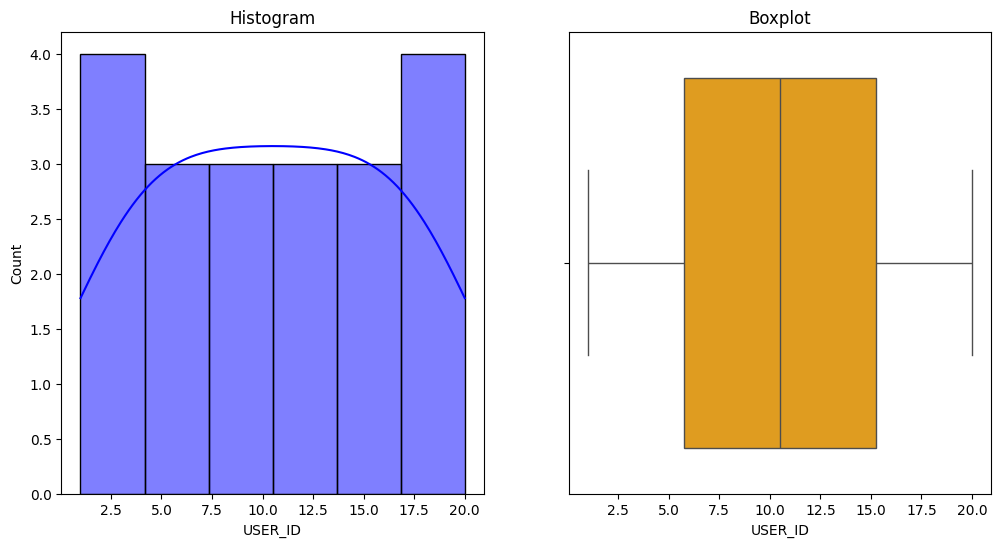

Skewness: 0.0
Normal
Mean: 10.5



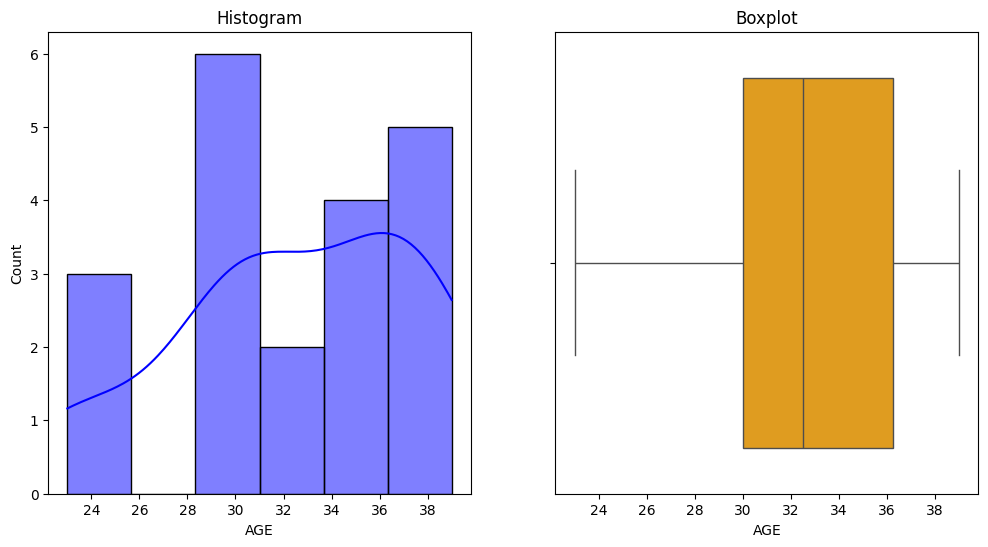

Skewness: -0.5363684704749339
Skewed
Mean: 32.5



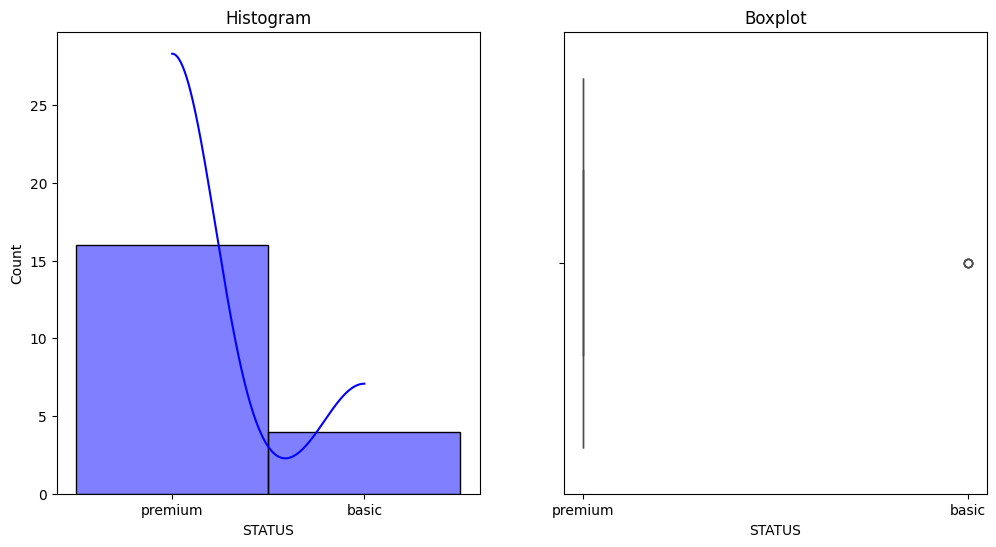

In [24]:
for column in df_user.columns:
    hist_boxplot(df_user, column)
    print()

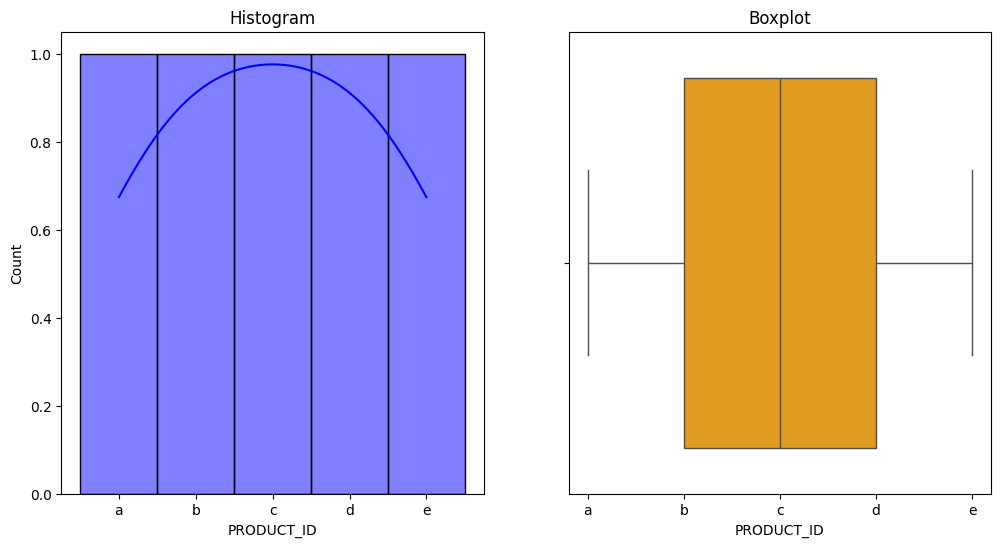

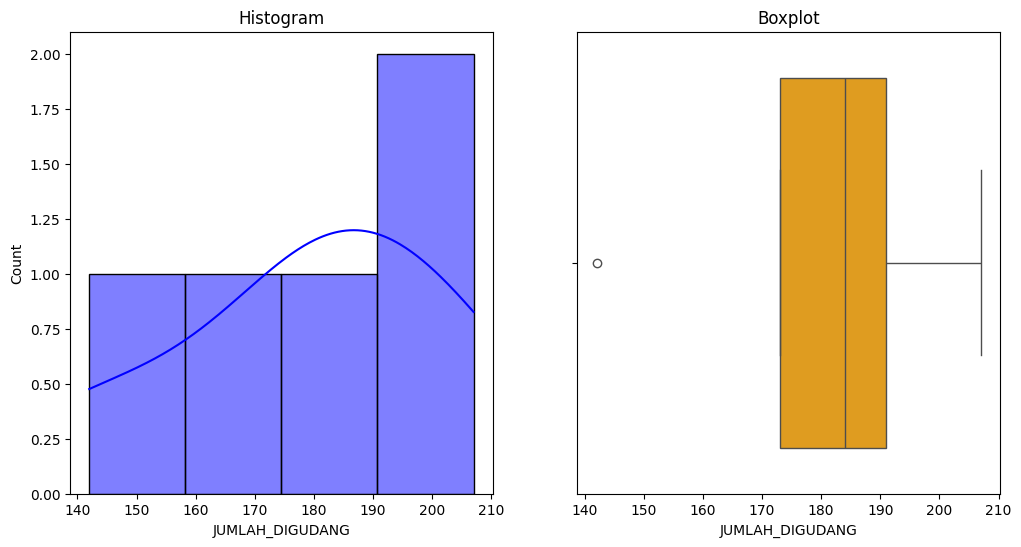

Skewness: -0.8706688714455363
Skewed
Mean: 179.4



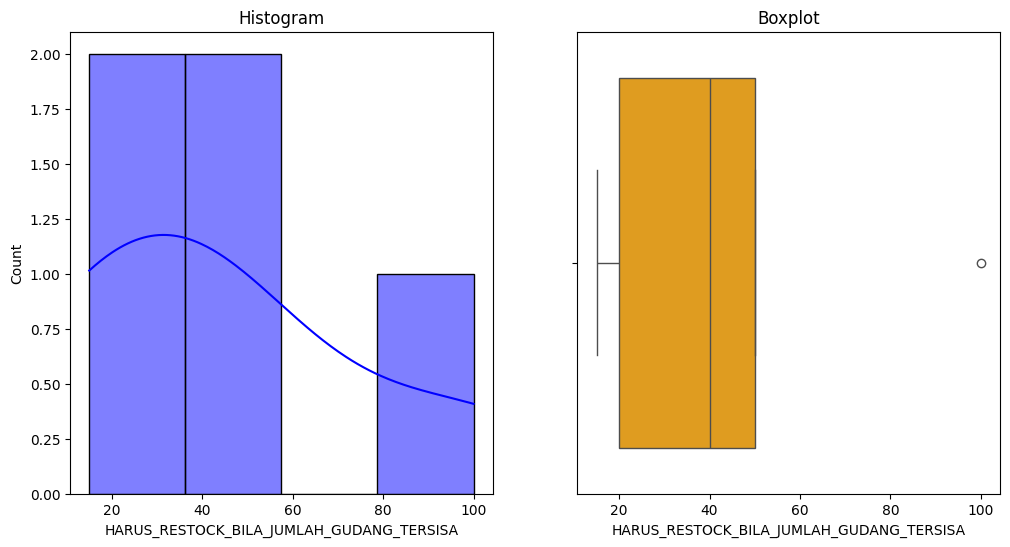

Skewness: 1.3221697155194578
Skewed
Mean: 45.0



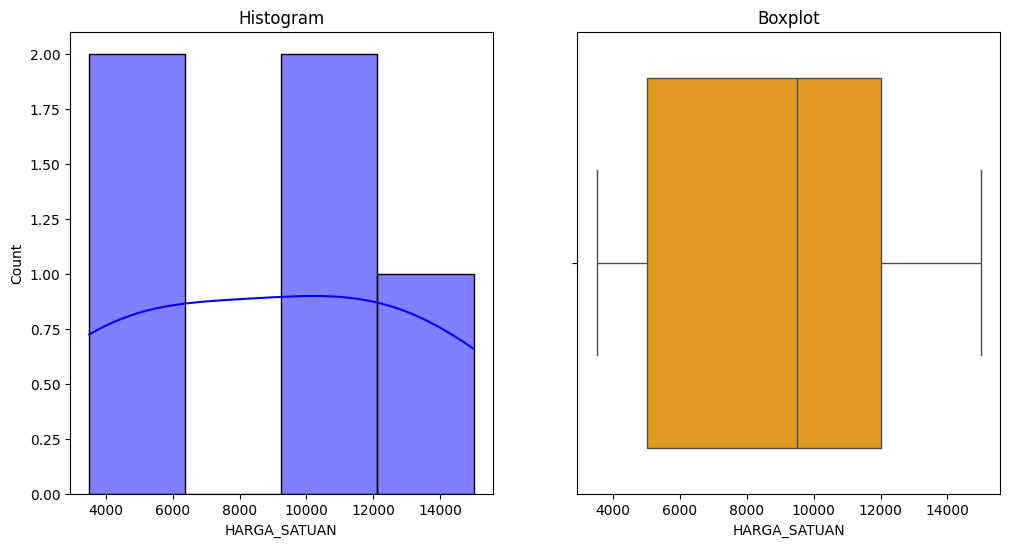

Skewness: 0.04855760846622068
Normal
Mean: 9000.0



In [25]:
for column in df_produk.columns:
    hist_boxplot(df_produk, column)
    print()

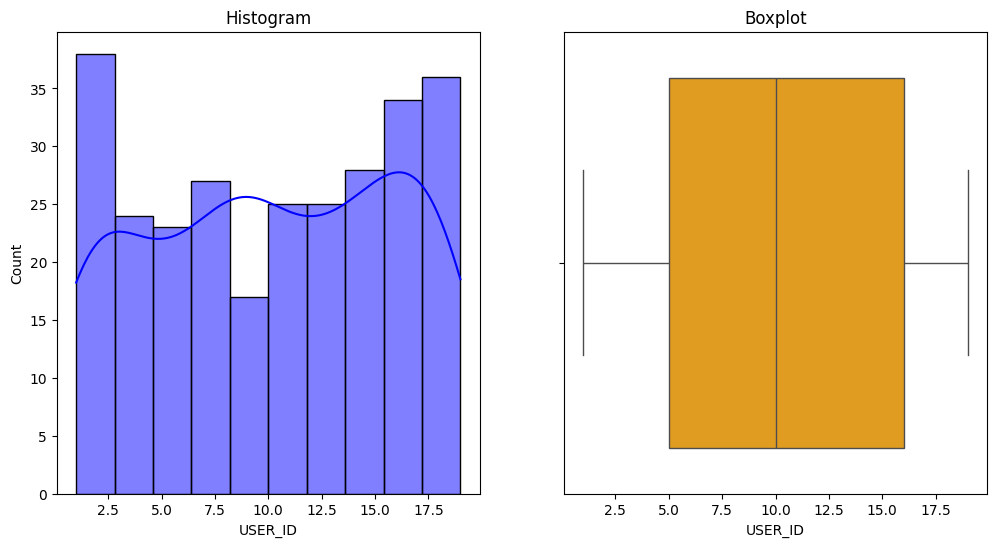

Skewness: -0.09202584137960204
Normal
Mean: 10.184115523465705



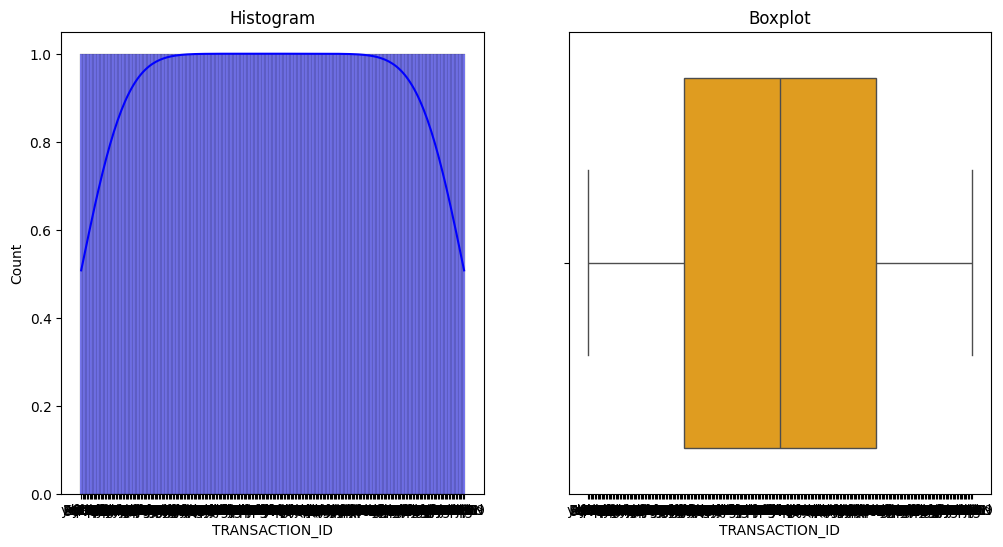

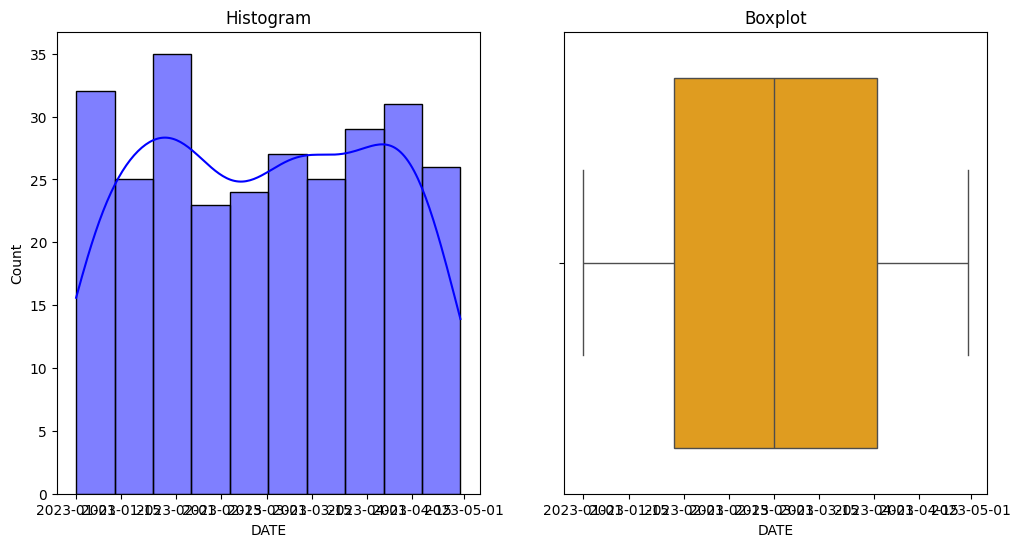

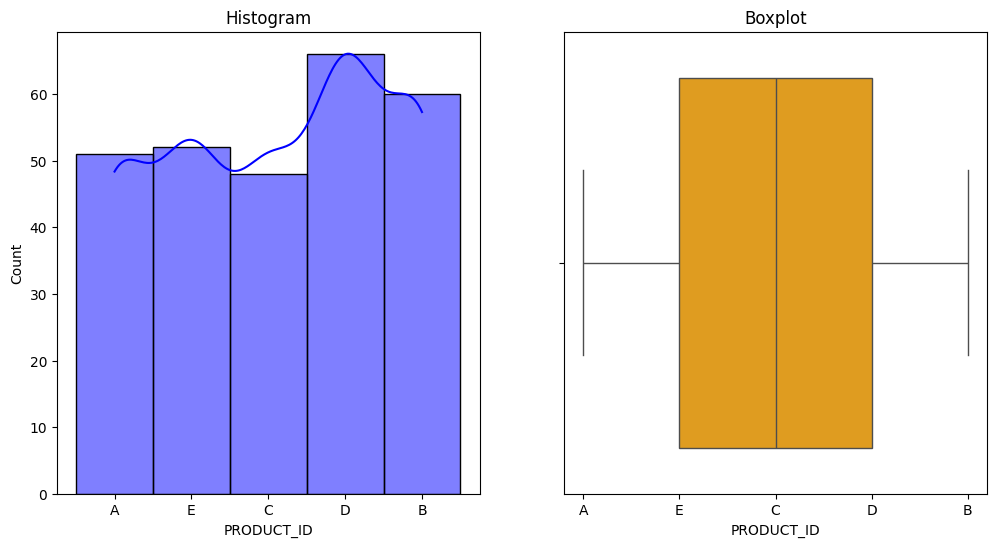

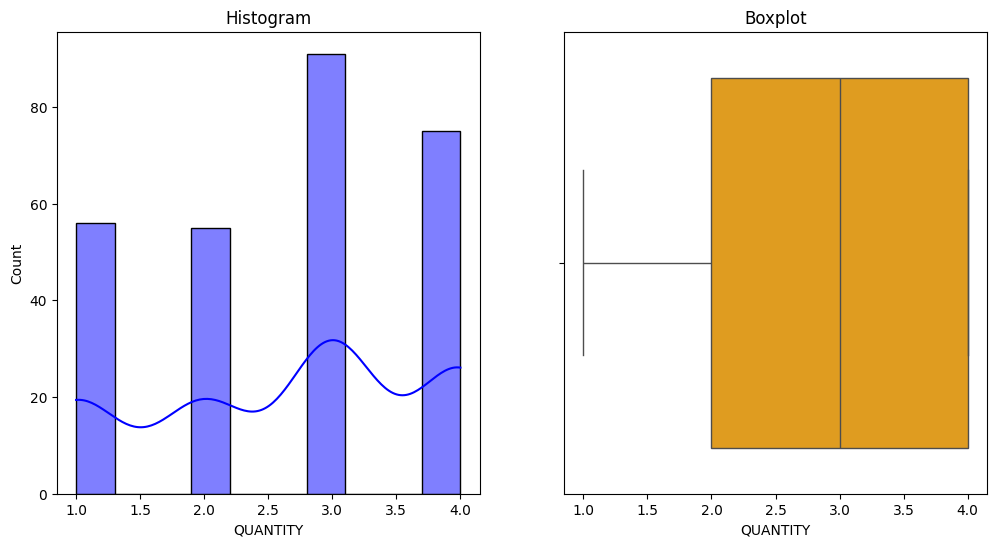

Skewness: -0.274946079772133
Normal
Mean: 2.667870036101083



In [26]:
for column in df_transaksi.columns:
    hist_boxplot(df_transaksi, column)
    print()

## Save data clean

In [27]:
df_user.to_csv('data/userclean.csv', index=False)
df_produk.to_csv('data/produkclean.csv', index=False)
df_transaksi.to_csv('data/transaksiclean.csv')


# Bagaimana kondisi penjualan dari perusahaan?

## Analisis Tren Penjualan

In [28]:
df_transaksi_date = df_transaksi.copy()

In [29]:
df_transaksi_date.set_index('DATE', inplace=True)

In [30]:
# Menggunakan groupby untuk menjumlahkan 'Quantity' per hari
df_daily_sum = df_transaksi_date.groupby(df_transaksi_date.index)['QUANTITY'].sum()

In [31]:
df_daily_sum

DATE
2023-01-01    12.0
2023-01-02     7.0
2023-01-03     8.0
2023-01-04     8.0
2023-01-05    10.0
              ... 
2023-04-26     1.0
2023-04-27     9.0
2023-04-28     4.0
2023-04-29     7.0
2023-04-30    15.0
Name: QUANTITY, Length: 119, dtype: float64

In [32]:
import plotly.graph_objects as go

# Membuat plotly figure
fig = go.Figure()

# Menambahkan trace garis untuk jumlah penjualan
fig.add_trace(go.Scatter(x=df_daily_sum.index, 
                         y=df_daily_sum.values, 
                         mode='lines+markers', 
                         name='Jumlah Penjualan', 
                         line=dict(color='blue')))

# Menambahkan layout dan label
fig.update_layout(
    title='Tren Penjualan Harian',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Jumlah Penjualan'),
    showlegend=True
)

# Menampilkan plot
fig.show()


- Fluktuasi Penjualan: Terdapat fluktuasi yang signifikan dalam penjualan harian, ditunjukkan oleh puncak dan lembah yang tajam pada grafik. Ini menunjukkan bahwa penjualan sangat bervariasi dari hari ke hari.
- Trend Musiman: Puncak pembelian selalu ada di pertengahan bulan (tanggal 10 sampai tanggal 15), penurunan pembelian terendah ada di awal dan akhir bulan


# Bagaimana distribusi pelanggan yang membeli produk perusahaan?


In [33]:
df_transaksi

,USER_ID,TRANSACTION_ID,DATE,PRODUCT_ID,QUANTITY
0,14,ye2z9,2023-01-01,A,3.0
1,17,2yb1J,2023-01-01,E,3.0
2,1,EhrXU,2023-01-01,C,4.0
3,5,9tNQZ,2023-01-01,D,2.0
4,17,Mv68i,2023-01-02,A,3.0
...,...,...,...,...,...
292,3,BIt6G,2023-04-29,C,4.0
294,18,S4NAN,2023-04-30,B,4.0
295,1,ZCe0d,2023-04-30,D,4.0
296,14,4jtlL,2023-04-30,E,3.0


In [34]:
df_user

,USER_ID,AGE,STATUS
0,1,32,premium
1,2,36,premium
2,3,39,premium
3,4,30,premium
4,5,33,basic
5,6,36,premium
6,7,30,premium
7,8,25,basic
8,9,37,premium
9,10,36,premium


In [35]:
# Menggabungkan df_transaksi dengan df_user berdasarkan 'User_ID'
df = pd.merge(df_transaksi, df_user[['USER_ID', 'AGE', 'STATUS']], on='USER_ID', how='left')

# Menentukan harga berdasarkan PRODUCT_ID
df['HARGA_SATUAN'] = np.where(df['PRODUCT_ID'] == 'A', 5000,
                              np.where(df['PRODUCT_ID'] == 'B', 3500,
                                       np.where(df['PRODUCT_ID'] == 'C', 12000,
                                                np.where(df['PRODUCT_ID'] == 'D', 15000,
                                                         np.where(df['PRODUCT_ID'] == 'E', 9500, 0)
                                                        )
                                               )
                                      )
                             )

# Menghitung nilai transaksi (NILAI_TRANSAKSI)
df['NILAI_TRANSAKSI'] = df['QUANTITY'] * df['HARGA_SATUAN']

# Mengganti urutan kolom
df = df[['DATE','USER_ID', 'AGE', 'STATUS', 'TRANSACTION_ID', 'PRODUCT_ID', 'HARGA_SATUAN', 'QUANTITY', 'NILAI_TRANSAKSI']]

# Menampilkan DataFrame df setelah penambahan kolom NILAI_TRANSAKSI
df.head(5)

,DATE,USER_ID,AGE,STATUS,TRANSACTION_ID,PRODUCT_ID,HARGA_SATUAN,QUANTITY,NILAI_TRANSAKSI
0,2023-01-01,14,38,premium,ye2z9,A,5000,3.0,15000.0
1,2023-01-01,17,37,premium,2yb1J,E,9500,3.0,28500.0
2,2023-01-01,1,32,premium,EhrXU,C,12000,4.0,48000.0
3,2023-01-01,5,33,basic,9tNQZ,D,15000,2.0,30000.0
4,2023-01-02,17,37,premium,Mv68i,A,5000,3.0,15000.0


In [36]:
df.to_csv('data/df.csv', index=False)


## Analisis Frekuensi Pembelian:

In [37]:
# Mengelompokkan data berdasarkan Product_ID dan menjumlahkan quantity
pembelian_user = df.groupby(['USER_ID', 'STATUS'])[['QUANTITY', 'NILAI_TRANSAKSI']].sum().reset_index()
pembelian_user = pembelian_user.sort_values('NILAI_TRANSAKSI', ascending=False)
pembelian_user = pembelian_user.reset_index().drop(columns=['index'])
pembelian_user

,USER_ID,STATUS,QUANTITY,NILAI_TRANSAKSI
0,1,premium,65.0,656500.0
1,16,premium,57.0,553500.0
2,19,premium,45.0,464500.0
3,14,premium,46.0,451500.0
4,18,premium,54.0,423500.0
5,8,basic,44.0,413500.0
6,9,premium,49.0,388000.0
7,10,premium,40.0,374000.0
8,6,premium,37.0,343000.0
9,17,premium,33.0,333500.0


In [38]:
# Mengubah 'USER_ID' menjadi tipe data object
pembelian_user['USER_ID'] = pembelian_user['USER_ID'].astype(str)

In [39]:
import plotly.express as px

# Membuat bar chart
fig = px.bar(pembelian_user, 
             x='USER_ID', 
             y='NILAI_TRANSAKSI',  
             color='STATUS', 
             hover_data=['QUANTITY'],
             title='Distribusi Pelanggan Berdasarkan Status, Quantity, dan Nilai Transaksi',
             color_discrete_map={'premium': 'blue', 'basic': 'orange'}
             )

# Menyesuaikan label sumbu x dan y
fig.update_layout(
    xaxis_title='USER ID',
    yaxis_title='NILAI TRANSAKSI',
)
# Menampilkan plot
fig.show()


c:\Users\Pongo\miniconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



- Pelanggan dengan status `premium` memiliki jumlah pembelian dan nilai transaksi yang lebih tinggi dibandingkan dengan pelanggan `basic`.
- Pelanggan dengan status `premium` memiliki kontribusi yang signifikan terhadap total nilai transaksi perusahaan.
- Beberapa pelanggan dengan USER_ID tertentu, seperti USER_ID 1, 16, 8, dan 19, memiliki jumlah pembelian dan nilai transaksi yang tinggi. Ini menunjukkan bahwa sebagian pelanggan tersebut memberikan kontribusi besar terhadap pendapatan perusahaan.
- Status `premium` tidak hanya terkait dengan jumlah pembelian yang lebih tinggi tetapi juga dengan nilai transaksi yang lebih besar. Pelanggan dengan status `premium`" cenderung melakukan pembelian dengan nilai yang lebih tinggi.
- Meskipun pelanggan dengan status `basic` memiliki jumlah pembelian dan nilai transaksi yang lebih rendah dibandingkan dengan pelanggan `premium`, mereka masih berkontribusi pada pendapatan perusahaan. Strategi pemasaran dan retensi pelanggan dapat difokuskan untuk meningkatkan kontribusi dari pelanggan `basic`.
- Meskipun mayoritas pelanggan memiliki status `premium`, tidak selalu berarti nilai transaksi yang dihasilkan oleh pelanggan `premium` lebih tinggi daripada pelanggan dengan status `basic`. Beberapa pelanggan dengan status `basic` juga menunjukkan nilai transaksi yang cukup signifikan, bahkan  melebihi beberapa pelanggan dengan status `premium`. Ini menunjukkan bahwa tidak selalu status pelanggan yang menentukan nilai transaksi yang dihasilkan.
-  Distribusi pelanggan dapat dilihat dari nilai-nilai kuantitas pembelian dan nilai transaksi. Pelanggan dengan nilai kuantitas dan nilai transaksi yang tinggi dapat dianggap sebagai pelanggan utama yang berkontribusi besar terhadap pendapatan perusahaan.

# Bagaimana kondisi ketersediaan produk di gudang? Apakah masih terpenuhi aman atau harus segera dilakukan pengisian ulang?

In [40]:
df_produk

,PRODUCT_ID,JUMLAH_DIGUDANG,HARUS_RESTOCK_BILA_JUMLAH_GUDANG_TERSISA,HARGA_SATUAN
0,a,191,50,5000
1,b,173,100,3500
2,c,142,40,12000
3,d,207,15,15000
4,e,184,20,9500


In [41]:
# Plotly Bar Chart
fig = px.bar(df_produk, 
             x=df_produk['PRODUCT_ID'], 
             y='HARUS_RESTOCK_BILA_JUMLAH_GUDANG_TERSISA', 
             color='PRODUCT_ID',
             labels={'HARUS_RESTOCK_BILA_JUMLAH_GUDANG_TERSISA': 'Batas Restock'},
             title='Kondisi Ketersediaan Produk di Gudang',
             color_discrete_map={ 'a': 'orange', 'b': 'orange', 'c': 'orange', 'd': 'orange', 'e': 'orange'})

# Menambahkan bar tambahan
fig.add_bar(x=df_produk['PRODUCT_ID'], 
            y=df_produk['JUMLAH_DIGUDANG'],
            name='Tersedia',
            marker_color='blue')

fig.update_layout(xaxis_title='PRODUCT_ID', yaxis_title='Jumlah')
fig.show()

c:\Users\Pongo\miniconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Berdasarkan data yang ada bahwa ketersediaan di gudang masih aman karena masih diatas batas peraturan restock. Sehingga tidak diperlukannya pengisian ulang 

# Produk mana yang mendapatkan performa penjualan terbaik dan yang kurang baik?

In [42]:
# Mengelompokkan data berdasarkan Product_ID dan menjumlahkan quantity
produk_terjual = df_transaksi.groupby('PRODUCT_ID')['QUANTITY'].sum().reset_index()
produk_terjual = produk_terjual.sort_values('QUANTITY', ascending=False)
produk_terjual.reset_index().drop(columns=['index'])

,PRODUCT_ID,QUANTITY
0,D,166.0
1,B,154.0
2,E,150.0
3,A,143.0
4,C,126.0


In [43]:
import plotly.express as px

# Membuat pie chart
fig = px.bar(produk_terjual, 
             x='PRODUCT_ID', 
             y='QUANTITY',
             color='PRODUCT_ID', 
             title='Distribusi Quantity Berdasarkan Product_ID')

# Menyesuaikan label sumbu x dan y
fig.update_layout(
    xaxis_title='PRODUCT ID',
    yaxis_title='QUANTITY',
)

fig.show()

c:\Users\Pongo\miniconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [44]:
(166 + 154 + 150 + 143 + 126)/5

147.8

Berdasarkan data yang ada didapatkan produk D memiliki kuantitas penjualan terbaik/tertinggi dengan jumlah 166, diikuti oleh B sebanyak 154, E sebanyak 150, A sebanyak 143 (performa kurang baik), dan C sebanyak 126 (performa kurang baik).

# Bagaimana cara meningkatkan penjualan dari perusahaan?


1. Mengingat adanya tren musiman, perusahaan dapat mengembangkan strategi pemasaran yang berfokus pada periode puncak waktu pertengahan bulan, seperti menawarkan promosi khusus di pertengahan bulan untuk merangsang lebih banyak pembelian pada periode ini. Di periode rendah, fokus pada retensi pelanggan dan membangun loyalitas.

2.  Dengan memahami bahwa pelanggan dengan status premium memberikan kontribusi besar, perusahaan dapat mengembangkan program loyalitas atau penawaran eksklusif untuk mempertahankan dan menarik pelanggan dengan status ini.

3. Mengembangkan strategi untuk meningkatkan penjualan produk C dan A (performa kurang baik), dengan melakukan bundling  agar terjadinya peningkatan penjualan produk C dan A melalui program bundling tersebut. 

4. D adalah winning produk sehingga perluasan produksi, distribusi, dan pemasaran dapat membantu memperluas pangsa pasar dan keuntungan melalui Produk D. Meskipun produk D sukses, tidak ada jaminan bahwa tren akan tetap berlangsung selamanya. Pertimbangkan untuk mengembangkan produk potensian (B dan E) untuk mengurangi risiko ketergantungan pada satu produk.

5. Khusus pada profile pelanggan status basic dengan USER ID 8, perlu diperhatikan lebih lanjut. Karena user ini sangat potensial, mengingat walaupun statusnya basic tetapi quantitas pembeliannya sangat tinggi jika dibandingkan dengan user yang lain pada status yang sama. User seperti ini perlu dipertahankan dengan cara tetap mempertahankan dan meningkatkan kualitas produk layanan yang sudah ada.


# Kesimpulan

Proses pengolahan data sebelum dilakukan analisa:
1. Tidak terdapat duplikasi data setelah dicek
2. Setiap nama kolom diseragamkan menggunakan kapital
3. Merubah kesesuaian tipe data
4. Melakukan handling missing values dengan cara penghapusan
5. Setiap data tidak memiliki outliers walaupun pada boxplot terdapat visualisasi outliers. Hal ini dikarenaka data tersebut adalah data yang benar adanya

Hasil analisa:
- Fluktuasi Penjualan: Terdapat fluktuasi yang signifikan dalam penjualan harian, ditunjukkan oleh puncak dan lembah yang tajam pada grafik. Ini menunjukkan bahwa penjualan sangat bervariasi dari hari ke hari.
- Trend Musiman: Puncak pembelian selalu ada di pertengahan bulan (tanggal 10 sampai tanggal 15), penurunan pembelian terendah ada di awal dan akhir bulan

- Pelanggan dengan status `premium` memiliki jumlah pembelian dan nilai transaksi yang lebih tinggi dibandingkan dengan pelanggan `basic`.
- Pelanggan dengan status `premium` memiliki kontribusi yang signifikan terhadap total nilai transaksi perusahaan.
- Beberapa pelanggan dengan USER_ID tertentu, seperti USER_ID 1, 16, 8, dan 19, memiliki jumlah pembelian dan nilai transaksi yang tinggi. Ini menunjukkan bahwa sebagian pelanggan tersebut memberikan kontribusi besar terhadap pendapatan perusahaan.
- Status `premium` tidak hanya terkait dengan jumlah pembelian yang lebih tinggi tetapi juga dengan nilai transaksi yang lebih besar. Pelanggan dengan status `premium`" cenderung melakukan pembelian dengan nilai yang lebih tinggi.
- Meskipun pelanggan dengan status `basic` memiliki jumlah pembelian dan nilai transaksi yang lebih rendah dibandingkan dengan pelanggan `premium`, mereka masih berkontribusi pada pendapatan perusahaan. Strategi pemasaran dan retensi pelanggan dapat difokuskan untuk meningkatkan kontribusi dari pelanggan `basic`.
- Meskipun mayoritas pelanggan memiliki status `premium`, tidak selalu berarti nilai transaksi yang dihasilkan oleh pelanggan `premium` lebih tinggi daripada pelanggan dengan status `basic`. Beberapa pelanggan dengan status `basic` juga menunjukkan nilai transaksi yang cukup signifikan, bahkan  melebihi beberapa pelanggan dengan status `premium`. Ini menunjukkan bahwa tidak selalu status pelanggan yang menentukan nilai transaksi yang dihasilkan.
-  Distribusi pelanggan dapat dilihat dari nilai-nilai kuantitas pembelian dan nilai transaksi. Pelanggan dengan nilai kuantitas dan nilai transaksi yang tinggi dapat dianggap sebagai pelanggan utama yang berkontribusi besar terhadap pendapatan perusahaan.

- Berdasarkan data yang ada bahwa ketersediaan di gudang masih aman karena masih diatas batas peraturan restock. Sehingga tidak diperlukannya pengisian ulang 

- Berdasarkan data yang ada didapatkan produk D memiliki kuantitas penjualan terbaik/tertinggi dengan jumlah 166, diikuti oleh B sebanyak 154, E sebanyak 150, A sebanyak 143 (performa kurang baik), dan C sebanyak 126 (performa kurang baik).

Cara meningkatkan penjualan berdasarkan analisa yang telah dilakukan:
1. Mengingat adanya tren musiman, perusahaan dapat mengembangkan strategi pemasaran yang berfokus pada periode puncak waktu pertengahan bulan, seperti menawarkan promosi khusus di pertengahan bulan untuk merangsang lebih banyak pembelian pada periode ini. Di periode rendah, fokus pada retensi pelanggan dan membangun loyalitas.

2.  Dengan memahami bahwa pelanggan dengan status premium memberikan kontribusi besar, perusahaan dapat mengembangkan program loyalitas atau penawaran eksklusif untuk mempertahankan dan menarik pelanggan dengan status ini.

3. Mengembangkan strategi untuk meningkatkan penjualan produk C dan A (performa kurang baik), dengan melakukan bundling  agar terjadinya peningkatan penjualan produk C dan A melalui program bundling tersebut. 

4. D adalah winning produk sehingga perluasan produksi, distribusi, dan pemasaran dapat membantu memperluas pangsa pasar dan keuntungan melalui Produk D. Meskipun produk D sukses, tidak ada jaminan bahwa tren akan tetap berlangsung selamanya. Pertimbangkan untuk mengembangkan produk potensian (B dan E) untuk mengurangi risiko ketergantungan pada satu produk.

5. Khusus pada profile pelanggan status basic dengan USER ID 8, perlu diperhatikan lebih lanjut. Karena user ini sangat potensial, mengingat walaupun statusnya basic tetapi quantitas pembeliannya sangat tinggi jika dibandingkan dengan user yang lain pada status yang sama. User seperti ini perlu dipertahankan dengan cara tetap mempertahankan dan meningkatkan kualitas produk layanan yang sudah ada.



Deployment: https://huggingface.co/spaces/dwiputra3500/Ecommerce-Analysis